# Collaborative Recommender

This recommender uses previous user ratings to predict how the user would feel about a movie they haven't yet watched. The final product is a list of unwatched movies returned, sorted by the user's estimated rating of the movie.

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import random

from surprise import Reader, Dataset, SVD, evaluate, accuracy
from surprise.model_selection import GridSearchCV, KFold, train_test_split
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVDpp

import time

import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [100]:
ratings = pd.read_csv('/Users/user/movielens-20m-dataset/rating.csv')

In [3]:
ratings.shape

(20000263, 4)

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
movies = pd.read_csv('/Users/user/movielens-20m-dataset/movie.csv')

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.shape

(27278, 3)

In [8]:
rated_movs = ratings.groupby('movieId').sum()
rated_movs.shape

(26744, 2)

In [9]:
users = ratings.groupby('userId').sum()
users.shape

(138493, 2)

We're looking at 20 million ratings on 26,744 movies, made by 138,493 users.

Text(0.5, 1.0, 'Rating Distribution (all users)')

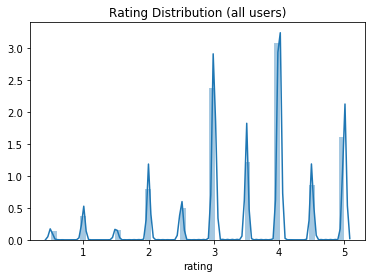

In [227]:
sns.distplot(ratings['rating'])
plt.title('Rating Distribution (all users)')

In [11]:
tags = pd.read_csv('/Users/user/movielens-20m-dataset/tag.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [12]:
genome_tags = pd.read_csv('/Users/user/movielens-20m-dataset/genome_tags.csv')
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [13]:
genome_scores = pd.read_csv('/Users/user/movielens-20m-dataset/genome_scores.csv')
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [14]:
genome_scores.shape

(11709768, 3)

In [15]:
links = pd.read_csv('/Users/user/movielens-20m-dataset/link.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [228]:
ratings.shape

(20000263, 4)

In [17]:
n_users = ratings.userId.unique().shape[0]
n_movies = ratings.movieId.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 138493 | Number of movies = 26744


In [29]:
reader = Reader(rating_scale=(1, 5))

In [31]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [32]:
# define a cross-validation iterator

start = time.time()

kf = KFold(n_splits=5)

algo = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7862
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.7856
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

In [265]:
rmses = [0.7862,0.7856,0.7856,0.7864,0.7858]
rmse_avg = round(sum(rmses) / len(rmses),5)
print('The mean RMSE of the full rating set is: {}'.format(rmse_avg))

The mean RMSE of the full rating set is: 0.78592


In [33]:
algo.predict(345,3954)

Prediction(uid=345, iid=3954, r_ui=None, est=2.953376558090905, details={'was_impossible': False})

In [34]:
ratings[ratings['userId'] == 345]

,userId,movieId,rating,timestamp
44668,345,111,4.0,2006-03-08 14:48:54
44669,345,223,3.0,2006-03-08 14:48:38
44670,345,266,2.0,2006-03-08 14:50:04
44671,345,508,4.5,2006-03-08 14:49:44
44672,345,594,3.0,2006-03-08 14:50:10
44673,345,750,5.0,2006-03-08 14:50:00
44674,345,919,2.0,2006-03-08 14:48:59
44675,345,1101,3.0,2006-03-08 14:50:15
44676,345,1220,3.5,2006-03-08 14:49:55
44677,345,1221,4.0,2006-03-08 14:48:46


In [36]:
ratings[ratings['movieId'] == 3954].head(1)

,userId,movieId,rating,timestamp
90419,632,3954,2.0,2003-04-24 02:18:42


In [71]:
def check_system(Id,movieId,limit,df=ratings,userId='userId',algo=algo):
    user_df = df[df['userId'] == Id]
    rated_movs = user_df['movieId'].tolist()
    #est_list = []
    
    #for i in range(0,len(rated_movs)):
    #    a = round(algo.predict(userId,rated_movs[i]).est,2)
    #    est_list.append(a)
    
    #user_df['est'] = est_list
    user_df['est'] = user_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    
    if limit == None:
        return user_df
    
    else:
        return user_df.head(limit)

In [ ]:
runtimes = []

In [76]:
start = time.time()

check_system(345,'movieId',None)

Runtime = time.time() - start
runtimes.append(Runtime)

In [77]:
runtimes 

[27.562493324279785, 8.007270812988281]

In [78]:
check_system(345,'movieId',None)

,userId,movieId,rating,est
44668,345,111,4.0,3.85
44669,345,223,3.0,3.65
44670,345,266,2.0,3.10
44671,345,508,4.5,3.86
44672,345,594,3.0,3.56
44673,345,750,5.0,4.06
44674,345,919,2.0,4.04
44675,345,1101,3.0,3.30
44676,345,1220,3.5,3.77
44677,345,1221,4.0,3.93


# Analysis so far

Our SVD algorithm has a RMSE of 0.7858, which is not bad at all. I'm finding that the ratings tend to be centeralized, leaning toward mean ratings around 3-4 for every movie predicted and I'm wondering if this has to do with the distribution of ratings in the raw data and what we would get if we scaled it down to have a more even number of ratings in each bin.

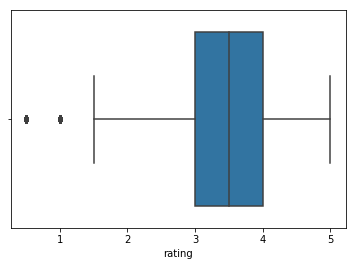

In [80]:
sns.boxplot(ratings['rating'])

Our results tend to fall within the boxplot's allotment for 'mean' ratings, meaning it might not be perfectly specified for users. We'll try training with a more even set.

In [82]:
ratings['rating'].value_counts()

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

Figuring out how to select these is hard, as having a 1:1 allotment of each rating could seriously skew the data in terms of how many movies we have or how many ratings. But I also want to be able to train the model accurately by letting it have an even number of movies to look at. So we'll pick 100,000 of each if there are more than 1,000,000 ratings, and include all the ratings if there are fewer.


In [87]:
alt_ratings = four_star

In [106]:
sub_sample(3.0,ratings)

In [116]:
alt_ratings = pd.DataFrame()
my_ratings = [4.0,3.0,5.0,3.5,4.5,2.0]
for rating in my_ratings:
    temp_df = ratings[ratings['rating'] == rating]
    temp_df = temp_df.sample(n=1000000)
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)

In [117]:
alt_ratings.shape

(6000000, 3)

In [112]:
alt_ratings = alt_ratings.drop('timestamp',axis=1)
ratings = ratings.drop('timestamp',axis=1)

In [118]:
ratings_left = [2.5,1.0,1.5,0.5]
for rating in ratings_left:
    temp_df = ratings[ratings['rating'] == rating]
    alt_ratings = pd.concat([alt_ratings,temp_df],axis=0)

In [119]:
alt_ratings['rating'].value_counts()

5.0    1000000
4.5    1000000
4.0    1000000
3.5    1000000
3.0    1000000
2.0    1000000
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

Now we have 1,000,000 ratings each of 5-2, and all the previous ratings of 2.5 stars to 0.5 stars. I am curious about how many users or movies we lost, and since we subsampled, I'm a little worried about not having enough data per user. Let's take a look.

Text(0.5, 1.0, 'Rating Distribution (adjusted)')

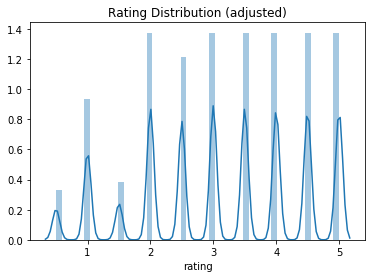

In [259]:
sns.distplot(alt_ratings['rating'])
plt.title('Rating Distribution (adjusted)')

In [123]:
data = Dataset.load_from_df(alt_ratings[['userId', 'movieId', 'rating']], reader)

In [124]:
# define a cross-validation iterator

start = time.time()

kf = KFold(n_splits=5)

svd = SVD(verbose=True)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    svd.fit(trainset)
    alt_pred = svd.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(alt_pred, verbose=True)
    
print("Runtime %0.2f" % (time.time() - start))

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.9437
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.9433
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Proc

In [264]:
rmses = [0.9443,0.9432,0.9429,0.9433,0.9437]
rmse_avg = round(sum(rmses) / len(rmses),5)
print('The mean RMSE of the adjusted rating set is: {}'.format(rmse_avg))

The mean RMSE of the adjusted rating set is: 0.94348


In [138]:
ratings['userId'].value_counts().mean()

144.4135299257002

In [231]:
alt_ratings.head()

,userId,movieId,rating
19781480,136957,34162,4.0
11513097,79463,1254,4.0
5392794,37053,5377,4.0
3344023,22875,2288,4.0
13715893,94768,1732,4.0


In [249]:
ratings.head()

,userId,movieId,rating,title
0,1,2,3.5,Jumanji (1995)
1,5,2,3.0,Jumanji (1995)
2,13,2,3.0,Jumanji (1995)
3,29,2,3.0,Jumanji (1995)
4,34,2,3.0,Jumanji (1995)


In [253]:
def check_system(Id,movieId,limit,df=ratings,userId='userId',algo=algo):
    '''
    This function checks the predicted rating against ratings made by the user
    And takes in an int UserId (Id)
    an int limit (the number of movies returned)
    dataframe columns necessary (movieId, userId)
    a dataframe of ratings (df)
    an algorithm (algo)
    '''
    # Isolates necessary columns from the dataframe
    df = df[[movieId,userId,'rating']]
    
    # Takes a subsample of the user's ratings
    user_df = df[df['userId'] == Id]
    if user_df.shape[0] >= df[userId].value_counts().mean():
        user_df = user_df.sample(frac=.10)
    else:
        user_df = user_df.sample(frac=.50)

    # Builds the dataframe to be returned     
    user_df['est'] = user_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    user_df['error'] = user_df['est']-user_df['rating']
    user_df['avg_error'] = user_df['error'].mean()
    
    # Returns a dataframe dependent on what the limit is set to
    if limit == None:
        user_df = pd.merge(user_df,movies_df,on=movieId)
        return user_df[[userId,movieId,'title','rating','est','error','avg_error']]
    else:
        if limit >= user_df.shape[0]:
            user_df = pd.merge(user_df,movies_df,on=movieId)
            return user_df[[userId,movieId,'title','rating','est','error','avg_error']]
        else:
            user_df = user_df.head(limit)
            user_df = pd.merge(user_df,movies_df,on=movieId)
            return user_df[[userId,movieId,'title','rating','est','error','avg_error']]

In [268]:
alt_ratings['userId'].value_counts().describe()

count    138485.000000
mean         58.363772
std         107.260209
min           1.000000
25%          13.000000
50%          25.000000
75%          59.000000
max        4378.000000
Name: userId, dtype: float64

In [269]:
ratings['userId'].value_counts().describe()

count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
Name: userId, dtype: float64

I want to look at how predictions turn out for users who have:

1. Rated lots of movies (large data to pull from)
2. Rated an average number of movies
3. Rated few movies (in the 25th percentile)

### Checking the ground truth for a user with max ratings (9254 ratings)

User 118205 rated a whopping 9254 movies.

In [271]:
# Get 10 ratings from this user

check_system(118205, 'movieId', 10)

,userId,movieId,title,rating,est,error,avg_error
0,118205,4606,Immediate Family (1989),3.0,3.13,0.13,-0.001189
1,118205,494,Executive Decision (1996),4.0,3.30,-0.70,-0.001189
2,118205,5962,Body of Evidence (1993),2.5,2.38,-0.12,-0.001189
3,118205,3315,Happy Go Lovely (1951),3.0,2.87,-0.13,-0.001189
4,118205,33905,Somebody Up There Likes Me (1956),3.5,3.55,0.05,-0.001189
5,118205,305,Ready to Wear (Pret-A-Porter) (1994),3.5,2.63,-0.87,-0.001189
6,118205,5169,Scarlet Street (1945),4.0,3.73,-0.27,-0.001189
7,118205,112672,Bullet for a Badman (Renegade Posse) (1964),3.0,3.30,0.30,-0.001189
8,118205,5607,"Son of the Bride (Hijo de la novia, El) (2001)",4.0,3.85,-0.15,-0.001189
9,118205,6733,I'm Going Home (Je rentre à la maison) (2001),3.0,3.34,0.34,-0.001189


### Checking the ground truth for a user who rated an average number of movies (144 ratings)


In [277]:
# ok find the user

find_user = ratings.copy()
find_user['count'] = 1
find_user = find_user.groupby('userId').sum()
find_user[find_user['count'] == 144].head(1)

,movieId,rating,count
userId,,,
1250,154925,528.0,144


Lucky user 1250 has rated 144 movies, let's see how the algorithm does.

In [278]:
check_system(1250, 'movieId', 10)

,userId,movieId,title,rating,est,error,avg_error
0,1250,477,What's Love Got to Do with It? (1993),4.0,3.64,-0.36,0.001111
1,1250,253,Interview with the Vampire: The Vampire Chroni...,3.0,3.45,0.45,0.001111
2,1250,1408,"Last of the Mohicans, The (1992)",5.0,3.72,-1.28,0.001111
3,1250,1721,Titanic (1997),4.0,3.66,-0.34,0.001111
4,1250,1624,"Thousand Acres, A (1997)",2.0,3.13,1.13,0.001111
5,1250,110,Braveheart (1995),5.0,4.38,-0.62,0.001111
6,1250,524,Rudy (1993),3.0,3.63,0.63,0.001111
7,1250,838,Emma (1996),4.0,4.00,0.00,0.001111
8,1250,153,Batman Forever (1995),3.0,3.12,0.12,0.001111
9,1250,2,Jumanji (1995),4.0,3.53,-0.47,0.001111


### Checking the ground truth for a user who rated a below-average number of movies (35 ratings)


In [279]:
# find them

find_user = ratings.copy()
find_user['count'] = 1
find_user = find_user.groupby('userId').sum()
find_user[find_user['count'] == 35].head(1)

,movieId,rating,count
userId,,,
9,111501,107.0,35


User number 9 has rated 35 movies, let's see how our algorithm does with them!

In [280]:
check_system(9, 'movieId', 10)

,userId,movieId,title,rating,est,error,avg_error
0,9,1219,Psycho (1960),3.0,3.63,0.63,0.011667
1,9,3994,Unbreakable (2000),3.0,3.44,0.44,0.011667
2,9,4148,Hannibal (2001),5.0,3.48,-1.52,0.011667
3,9,4030,Dracula 2000 (2000),2.0,2.70,0.70,0.011667
4,9,356,Forrest Gump (1994),4.0,3.95,-0.05,0.011667
5,9,3979,Little Nicky (2000),3.0,2.31,-0.69,0.011667
6,9,2706,American Pie (1999),4.0,3.17,-0.83,0.011667
7,9,2840,Stigmata (1999),3.0,3.20,0.20,0.011667
8,9,4034,Traffic (2000),1.0,3.52,2.52,0.011667
9,9,3798,What Lies Beneath (2000),5.0,3.60,-1.40,0.011667


In [168]:
movies_df = pd.read_csv('/Users/user/movielens-20m-dataset/movie.csv')
movies_df = movies_df[['movieId','title']]
movies_df.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


## Predicting ratings

In [281]:
def predict_ratings(Id, movieId, n, df=ratings, userId='userId', algo=algo):
    # Select some random movies from our set
    df = df[[movieId,userId,'rating']]
    movie_choices = df[movieId].unique()
    movies = np.random.choice(movie_choices,n)
    
    # Build the dataframe that we'll return
    predicted_df = pd.DataFrame()
    predicted_df['movieId'] = movies
    predicted_df['userId'] = Id
    
    predicted_df['est'] = predicted_df['movieId'].apply(lambda x: round(algo.predict(Id,x).est,2))
    
    # Grabbing the titles
    predicted_df = pd.merge(predicted_df,movies_df,on='movieId')
    
    
    return predicted_df[[userId,movieId,'title','est']]

In [283]:
predict_ratings(453,'movieId',10)

,userId,movieId,title,est
0,453,27095,"Hole, The (Dong) (1998)",3.92
1,453,55036,Gotti (1996),3.63
2,453,7264,An Amazing Couple (2002),3.97
3,453,50613,Dead Meat (2004),3.66
4,453,5412,"Villain, The (1979)",3.08
5,453,77709,"Sky Crawlers, The (Sukai kurora) (2008)",3.65
6,453,4835,Coal Miner's Daughter (1980),4.02
7,453,95499,Dragon Ball Z: Broly - The Legendary Super Sai...,3.70
8,453,83177,Yogi Bear (2010),2.71
9,453,25879,All Through the Night (1941),3.74


In [309]:
def predicted_top_n(Id, movieId, n, samples, df=ratings, userId='userId', algo=algo):
    '''
    This function returns n movies, sorted by predicted user rating, from a random sample of movies. 
    '''
    df = df[[movieId,userId,'rating']]

    movie_choices = df[movieId].unique()
    
    # Take out movies the user has already watched
    temp_df = ratings[ratings[userId] == Id]
    watched_movs = temp_df[movieId].unique()
    unwatched = np.setdiff1d(movie_choices,movies_watched)
    
    # Select random movies according to 'samples'
    if samples == None:
        movies = unwatched
        samples = movies.shape[0]
    elif samples <= unwatched.shape[0]:
         movies = np.random.choice(unwatched,samples)
    else:
        print("The sample size exceeds the available movies. Reset to {} movies".format(unwatched.shape[0]))
        movies = unwatched
        samples = movies.shape[0]
        
    # Build the dataframe that we'll return
    predicted_df = pd.DataFrame()
    predicted_df[movieId] = movies
    predicted_df[userId] = Id
    predicted_df['est'] = predicted_df[movieId].apply(lambda x: round(algo.predict(Id,x).est,2))
    predicted_df = predicted_df.sort_values(by='est', ascending=False)
    
    if n >= samples:
        predicted_df = pd.merge(predicted_df,movies_df,on=movieId)
        return predicted_df[[userId,'title','est']]
    else:
        predicted_df = predicted_df.head(n)
        predicted_df = pd.merge(predicted_df,movies_df,on=movieId)
        return predicted_df[[userId,'title','est']]

# Recommending unwatched movies

We wrote a function that does the following:

1. Creates a filtered list of movies that the user in question hasn't rated (ie hasn't watched)
2. The user is allowed to subsample a smaller set of movies if they want
3. If the user does not do above, all movies in the set are considered
4. A filtered dataframe is returned of unwatched movies and the user's estimated rating of the movie, sorted by the estimated rating
5. The user chooses how many movies they want.

### Case 1: User with the most ratings (User 118205, 9254 ratings)

In [310]:
predicted_top_n(118205, 'movieId', 10, None)

,userId,title,est
0,118205,Frozen Planet (2011),4.35
1,118205,"Civil War, The (1990)",4.28
2,118205,North & South (2004),4.27
3,118205,"Godfather, The (1972)",4.23
4,118205,Death on the Staircase (Soupçons) (2004),4.19
5,118205,Alone in the Wilderness (2004),4.18
6,118205,Connections (1978),4.18
7,118205,Prime Suspect (1991),4.17
8,118205,Bill Hicks: Revelations (1993),4.16
9,118205,Casablanca (1942),4.16


### Case 2: User with mean ratings (user 1250, 144 ratings)

In [311]:
predicted_top_n(1250, 'movieId', 10, None)

,userId,title,est
0,1250,Moulin Rouge (2001),4.65
1,1250,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",4.64
2,1250,Life Is Beautiful (La Vita è bella) (1997),4.63
3,1250,"Boondock Saints, The (2000)",4.62
4,1250,Frozen Planet (2011),4.57
5,1250,Interstellar (2014),4.55
6,1250,Inception (2010),4.53
7,1250,Bill Hicks: Revelations (1993),4.53
8,1250,Black Mirror (2011),4.52
9,1250,City of God (Cidade de Deus) (2002),4.52


### Case 3: User with few ratings (User 9, 35 ratings)

In [312]:
predicted_top_n(9, 'movieId', 10, None)

,userId,title,est
0,9,Frozen Planet (2011),4.43
1,9,"Dark Knight, The (2008)",4.34
2,9,Inception (2010),4.29
3,9,"Dark Knight Rises, The (2012)",4.28
4,9,Fight Club (1999),4.26
5,9,"Matrix, The (1999)",4.25
6,9,Snatch (2000),4.24
7,9,Prime Suspect (1991),4.24
8,9,Louis C.K.: Hilarious (2010),4.22
9,9,Louis C.K.: Live at the Beacon Theater (2011),4.18
